<a href="https://colab.research.google.com/github/Tharun0024/The-Sentiment-Signal-Predicting-Trader-Outcomes-from-Emotional-Market-States/blob/main/visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
fg_df = pd.read_csv('fear_greed_index.csv')      # Sentiment data
trader_df = pd.read_csv('historical_data.csv')   # Trader data


In [ ]:
import pandas as pd

# Load datasets
fg_df = pd.read_csv('fear_greed_index.csv')
trader_df = pd.read_csv('historical_data.csv')

# Fix date format in fg_df
fg_df['date'] = pd.to_datetime(fg_df['date']).dt.date

# Find the datetime column
datetime_col = [col for col in trader_df.columns if 'time' in col.lower()]
if datetime_col:
    trader_df['date'] = pd.to_datetime(trader_df[datetime_col[0]], dayfirst=True).dt.date
else:
    raise ValueError("No datetime column found.")

# Find the PnL column
pnl_col = [col for col in trader_df.columns if 'pnl' in col.lower()]
if pnl_col:
    trader_df.dropna(subset=['date', pnl_col[0]], inplace=True)
else:
    raise ValueError("No PnL column found.")

# Merge datasets
merged_df = pd.merge(trader_df, fg_df[['date', 'classification', 'value']], on='date', how='inner')

# Check result
print(merged_df.head())


                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   

   Closed PnL                                   Transaction Hash     Order ID  \
0         0.0  0xec0945

/tmp/ipython-input-8-3168490493.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged_df, x='classification',
/tmp/ipython-input-8-3168490493.py:9: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


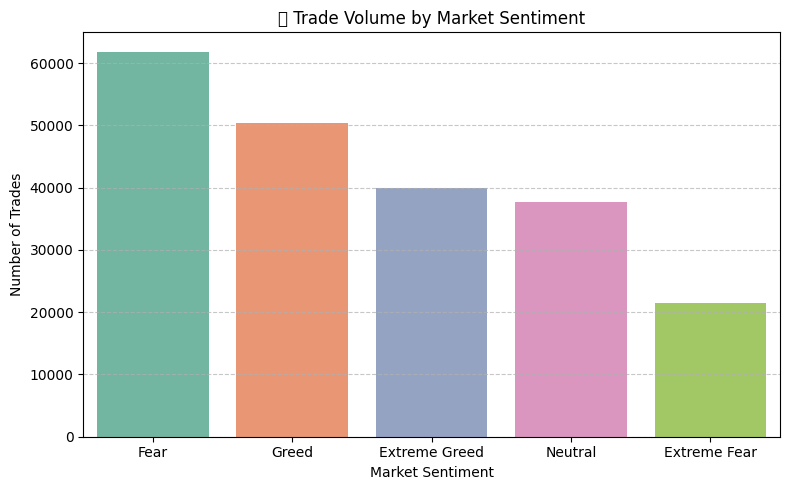

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=merged_df, x='classification',
              order=merged_df['classification'].value_counts().index,
              palette='Set2')
plt.title('📈 Trade Volume by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Number of Trades')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


/tmp/ipython-input-9-3991301605.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=merged_df, x='classification', y=merged_df[pnl_col[0]],
/tmp/ipython-input-9-3991301605.py:8: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


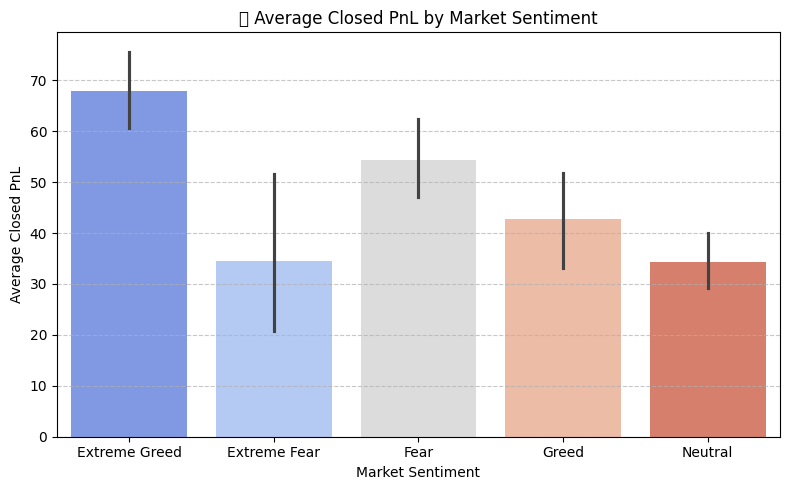

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(data=merged_df, x='classification', y=merged_df[pnl_col[0]],
            palette='coolwarm', estimator='mean')
plt.title('💰 Average Closed PnL by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Average Closed PnL')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


/tmp/ipython-input-11-2868510474.py:17: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


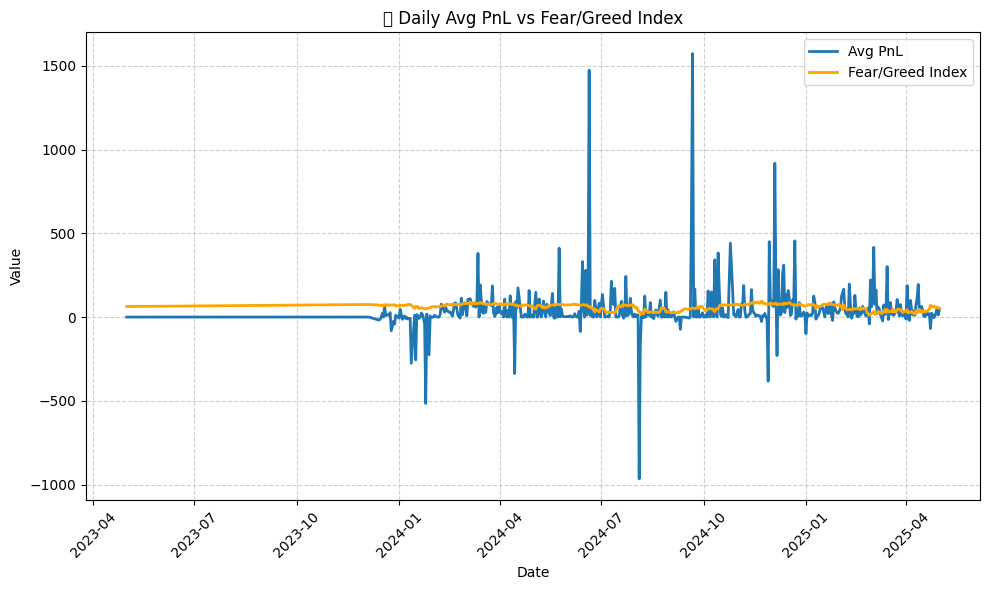

In [ ]:
# Create daily aggregates
daily_df = merged_df.groupby('date').agg({
    pnl_col[0]: 'mean',
    'value': 'mean'
}).reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=daily_df, x='date', y=pnl_col[0], label='Avg PnL', linewidth=2)
sns.lineplot(data=daily_df, x='date', y='value', label='Fear/Greed Index', color='orange', linewidth=2)
plt.title('📉 Daily Avg PnL vs Fear/Greed Index')
plt.xlabel('Date')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


/tmp/ipython-input-13-559636248.py:18: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


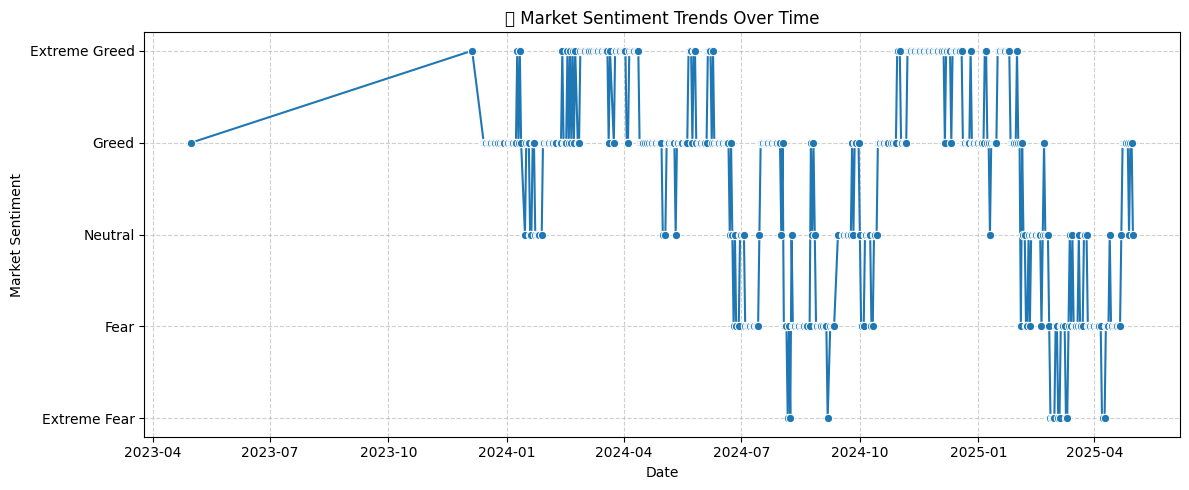

In [ ]:
# Convert back to datetime for plotting
merged_df['date'] = pd.to_datetime(merged_df['date'])

# Sort and drop duplicates to get one sentiment per day
daily_sentiment = merged_df[['date', 'classification']].drop_duplicates().sort_values('date')

# Plot sentiment as a sequence (optional: encode as number for pattern detection)
sentiment_map = {'Extreme Fear': 0, 'Fear': 1, 'Neutral': 2, 'Greed': 3, 'Extreme Greed': 4}
daily_sentiment['sentiment_level'] = daily_sentiment['classification'].map(sentiment_map)

plt.figure(figsize=(12, 5))
sns.lineplot(data=daily_sentiment, x='date', y='sentiment_level', marker='o')
plt.title('📅 Market Sentiment Trends Over Time')
plt.yticks(ticks=list(sentiment_map.values()), labels=list(sentiment_map.keys()))
plt.xlabel('Date')
plt.ylabel('Market Sentiment')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


/tmp/ipython-input-14-2369878314.py:17: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


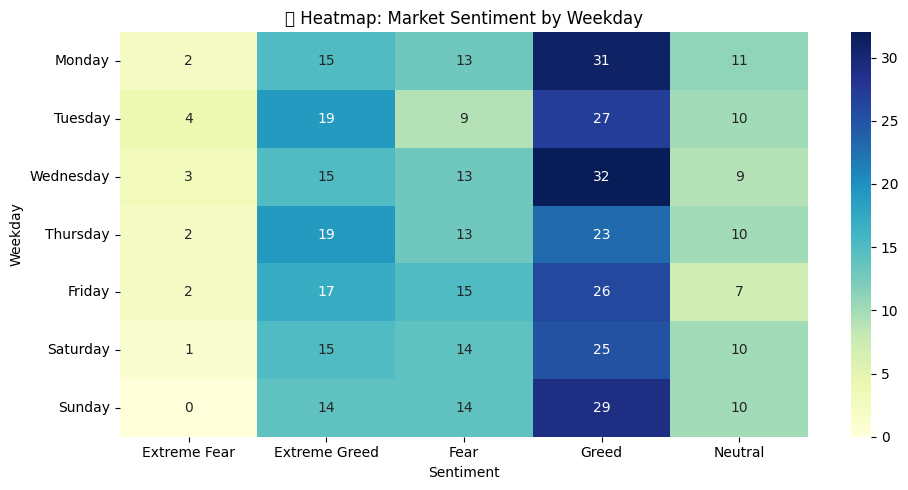

In [ ]:
# Add weekday info
daily_sentiment['weekday'] = daily_sentiment['date'].dt.day_name()

# Count of each sentiment by weekday
weekday_sentiment = daily_sentiment.groupby(['weekday', 'classification']).size().unstack(fill_value=0)

# Reorder weekday
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_sentiment = weekday_sentiment.reindex(weekday_order)

# Plot
plt.figure(figsize=(10, 5))
sns.heatmap(weekday_sentiment, cmap='YlGnBu', annot=True, fmt='d')
plt.title('📊 Heatmap: Market Sentiment by Weekday')
plt.ylabel('Weekday')
plt.xlabel('Sentiment')
plt.tight_layout()
plt.show()


In [ ]:
# Get unique daily sentiment (remove duplicates per day)
daily_sentiment = merged_df[['date', 'classification', pnl_col[0]]].drop_duplicates().sort_values('date')

# Create a column for "next day's sentiment"
daily_sentiment['next_sentiment'] = daily_sentiment['classification'].shift(-1)

# Create a column for "next day's PnL"
daily_sentiment['next_pnl'] = daily_sentiment[pnl_col[0]].shift(-1)

# Drop the last row (no next day)
daily_sentiment.dropna(subset=['next_sentiment'], inplace=True)

daily_sentiment.head()


,date,classification,Closed PnL,next_sentiment,next_pnl
83763,2023-05-01,Greed,0.000000,Extreme Greed,0.000000
39049,2023-12-05,Extreme Greed,0.000000,Greed,-13.230000
39058,2023-12-14,Greed,-13.230000,Greed,18.814096
39066,2023-12-14,Greed,18.814096,Greed,-514.003130
39059,2023-12-14,Greed,-514.003130,Greed,26.930054


In [ ]:
import plotly.graph_objects as go

# Count transitions from one sentiment to the next
transition_counts = daily_sentiment.groupby(['classification', 'next_sentiment']).size().reset_index(name='count')

# Prepare Sankey Diagram
source_labels = list(transition_counts['classification'].unique())
target_labels = list(transition_counts['next_sentiment'].unique())
all_labels = list(set(source_labels + target_labels))
label_to_index = {label: i for i, label in enumerate(all_labels)}

# Map labels to indices
source = transition_counts['classification'].map(label_to_index)
target = transition_counts['next_sentiment'].map(label_to_index)
values = transition_counts['count']

# Create Sankey plot
fig = go.Figure(data=[go.Sankey(
    node=dict(pad=15, thickness=20, line=dict(color="black", width=0.5),
              label=all_labels),
    link=dict(source=source, target=target, value=values)
)])
fig.update_layout(title_text="🔁 Market Sentiment Transition Flow", font_size=12)
fig.show()


/tmp/ipython-input-17-1983453223.py:13: UserWarning:

Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.



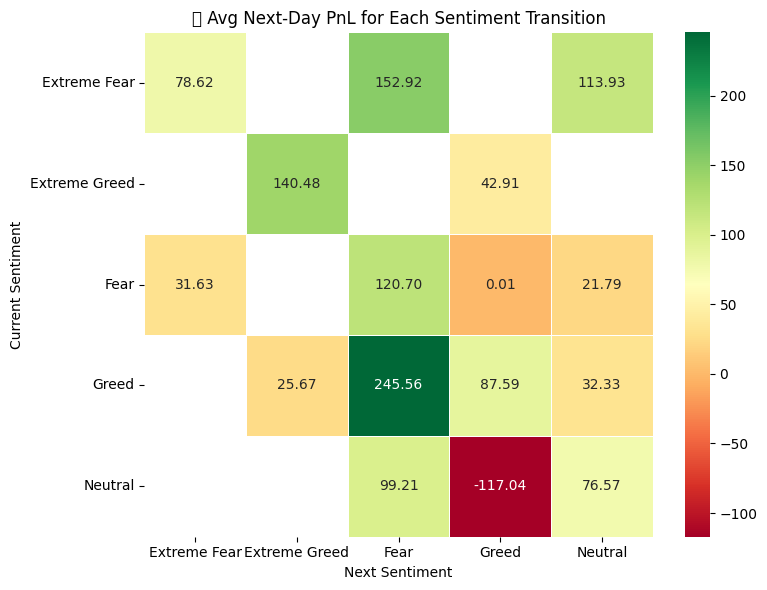

In [ ]:
# Group by transitions and average PnL
pnl_transitions = daily_sentiment.groupby(['classification', 'next_sentiment'])[['next_pnl']].mean().reset_index()

# Pivot for heatmap
heatmap_df = pnl_transitions.pivot(index='classification', columns='next_sentiment', values='next_pnl')

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(heatmap_df, annot=True, fmt=".2f", cmap='RdYlGn', linewidths=0.5)
plt.title("💰 Avg Next-Day PnL for Each Sentiment Transition")
plt.xlabel("Next Sentiment")
plt.ylabel("Current Sentiment")
plt.tight_layout()
plt.show()


In [ ]:
# Sort by date and drop duplicates
sentiment_df = merged_df[['date', 'classification', pnl_col[0]]].drop_duplicates().sort_values('date')

# Create a streak ID: increment when sentiment changes
sentiment_df['prev_sentiment'] = sentiment_df['classification'].shift(1)
sentiment_df['streak_change'] = (sentiment_df['classification'] != sentiment_df['prev_sentiment']).astype(int)
sentiment_df['streak_id'] = sentiment_df['streak_change'].cumsum()

# Group by streak
streaks = sentiment_df.groupby('streak_id').agg({
    'classification': 'first',
    'date': 'count',
    pnl_col[0]: 'mean'
}).reset_index()

streaks.columns = ['streak_id', 'sentiment', 'streak_length', 'avg_pnl']
streaks.head()


,streak_id,sentiment,streak_length,avg_pnl
0,1,Greed,1,0.000000
1,2,Extreme Greed,1,0.000000
2,3,Greed,380,7.107289
3,4,Extreme Greed,29,-28.494823
4,5,Greed,83,-18.279214


/tmp/ipython-input-19-4261174972.py:7: UserWarning:

Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.



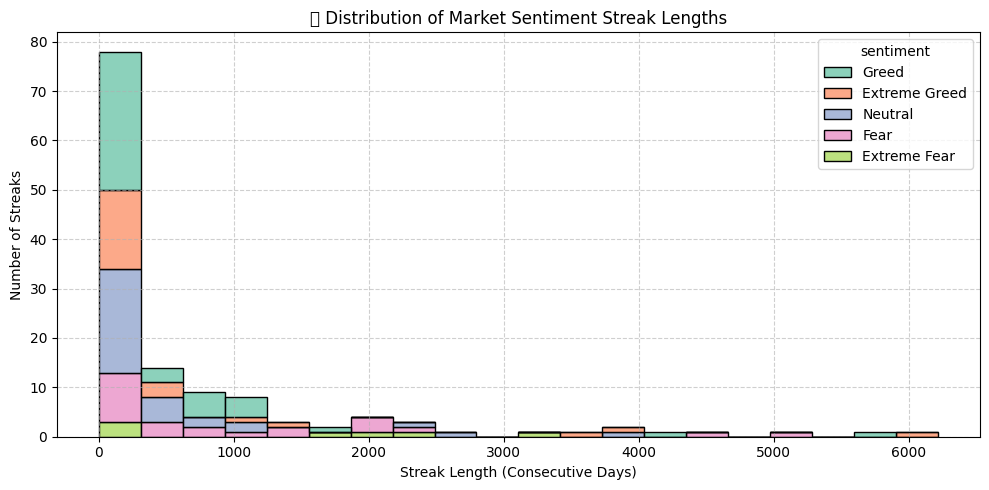

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(data=streaks, x='streak_length', hue='sentiment', multiple='stack', bins=20, palette='Set2')
plt.title("🔁 Distribution of Market Sentiment Streak Lengths")
plt.xlabel("Streak Length (Consecutive Days)")
plt.ylabel("Number of Streaks")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


/tmp/ipython-input-20-525411387.py:7: UserWarning:

Glyph 128184 (\N{MONEY WITH WINGS}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128184 (\N{MONEY WITH WINGS}) missing from font(s) DejaVu Sans.



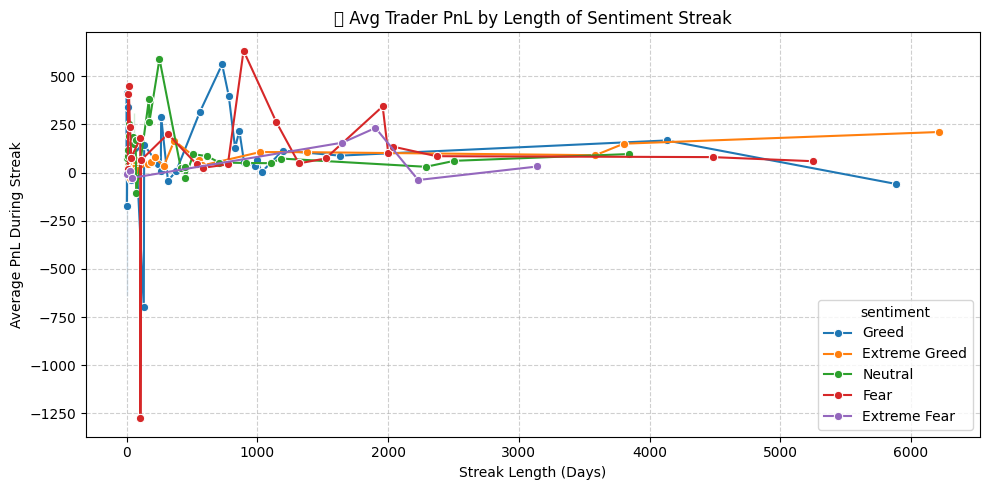

In [ ]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=streaks, x='streak_length', y='avg_pnl', hue='sentiment', marker='o')
plt.title("💸 Avg Trader PnL by Length of Sentiment Streak")
plt.xlabel("Streak Length (Days)")
plt.ylabel("Average PnL During Streak")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


/tmp/ipython-input-21-2623461112.py:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-21-2623461112.py:26: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-21-2623461112.py:34: UserWarning:

Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.

/tmp/ipython-input-21-2623461112.py:34: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.

/tmp/ipython-input-21-2623461112.py:34: UserWarning:

Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/

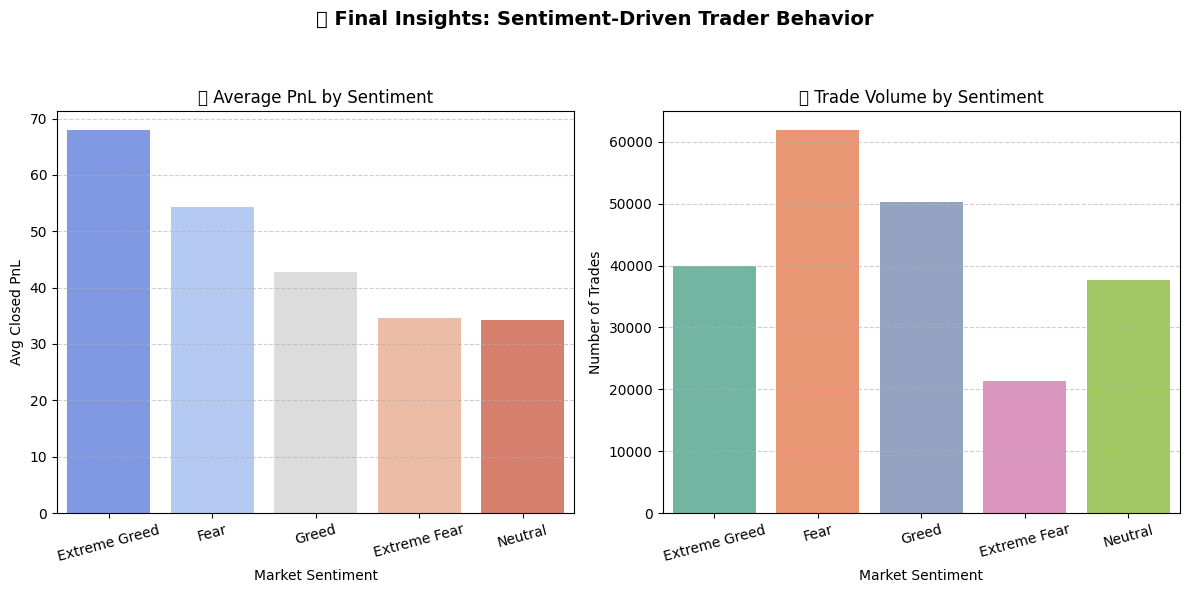

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute summary statistics by sentiment
summary_df = merged_df.groupby('classification').agg(
    trade_count=('date', 'count'),
    avg_pnl=(pnl_col[0], 'mean'),
    median_pnl=(pnl_col[0], 'median'),
    std_pnl=(pnl_col[0], 'std')
).reset_index().sort_values(by='avg_pnl', ascending=False)

# Plot all in one dashboard-style chart
plt.figure(figsize=(12, 6))

# Subplot 1: Avg PnL
plt.subplot(1, 2, 1)
sns.barplot(data=summary_df, x='classification', y='avg_pnl', palette='coolwarm')
plt.title("💰 Average PnL by Sentiment")
plt.ylabel("Avg Closed PnL")
plt.xlabel("Market Sentiment")
plt.xticks(rotation=15)
plt.grid(True, axis='y', linestyle='--', alpha=0.6)

# Subplot 2: Trade Volume
plt.subplot(1, 2, 2)
sns.barplot(data=summary_df, x='classification', y='trade_count', palette='Set2')
plt.title("📊 Trade Volume by Sentiment")
plt.ylabel("Number of Trades")
plt.xlabel("Market Sentiment")
plt.xticks(rotation=15)
plt.grid(True, axis='y', linestyle='--', alpha=0.6)

plt.suptitle("📌 Final Insights: Sentiment-Driven Trader Behavior", fontsize=14, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()
